<a href="https://colab.research.google.com/github/lsantiago/PythonIntermedio/blob/master/Talleres/PrimerBimestre/TallerNro2-PANDA-MATPLOTLIB/TallerNro2PB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TALLER NRO. 2, PANDAS + MATPLOTLIB

Kelvin Ricardo Arrobo Castillo

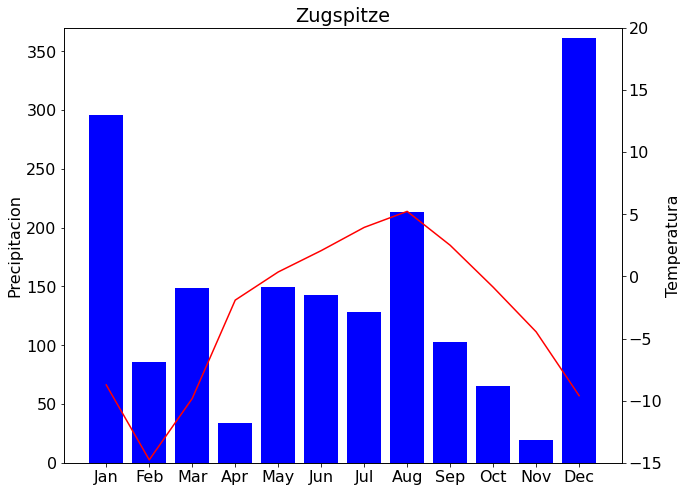

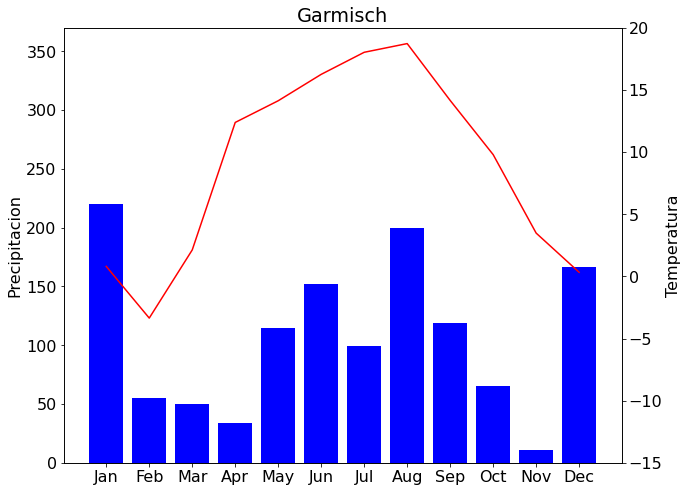

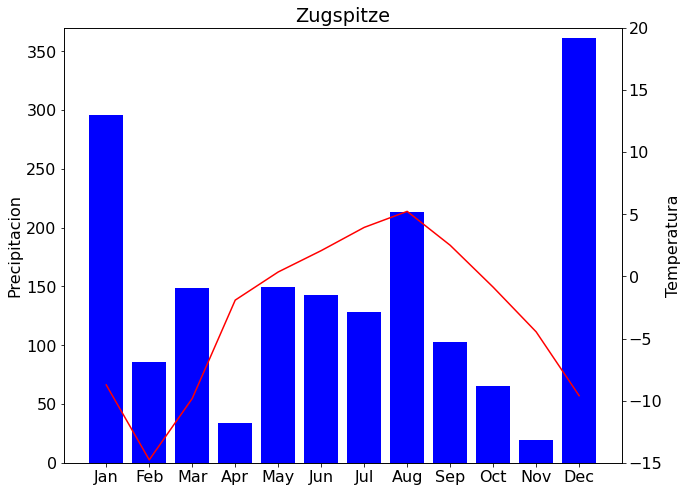

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Importar ambas tablas de datos en python usando pandas. Poner la columna del índice en "MESS_DATUM" y analizar los valores de la columna como fechas.
garmisch  = pd.read_csv('data/garmisch.txt',index_col="MESS_DATUM",sep=";",parse_dates=['MESS_DATUM'], na_values='')
zugspitze = pd.read_csv('data/zugspitze.txt',index_col="MESS_DATUM",sep=";",parse_dates=['MESS_DATUM'], na_values='')

# Recorta las tablas a el año 2018 [1P]
garmisch2018 = garmisch.loc['2018']
zugspitze2018 = zugspitze.loc['2018']

# Volver a muestrear los datos de temperatura a promedios mensuales (" TMK") y los datos de precipitaciones a sumas mensuales (" RSK"): [1P]
garmisch_agg  = garmisch2018.loc[:, [' TMK', ' RSK']].resample('1M').agg({' TMK': 'mean', ' RSK': 'sum'})
zugspitze_agg  = zugspitze2018.loc[:, [' TMK', ' RSK']].resample('1M').agg({' TMK': 'mean', ' RSK': 'sum'})

# Define una función de trazado que dibuja un simple diagrama climático
# Agrega los argumentos como se menciona en la lista de documentos abajo [1P]
# Establece el rango de temperatura por defecto de -15°C a 20°C y el rango de precipitaciones de 0mm a 370mm [1P]

def crear_diagrama_climatico(df, temp_col, prec_col, title, filename, temp_min=-15, temp_max=20, prec_min=0, prec_max=370):

    fig = plt.figure(figsize=(10,8))
    plt.rcParams['font.size'] = 16

    ax2 = fig.add_subplot(111)
    ax1 = ax2.twinx()

    
    
    # Dibuja los valores de temperatura como una línea roja y los valores de precipitación como barras azules: [1P]
    # Pista: Revisa la documentación de matplotlib cómo trazar gráficos de barras (plt.bar?). Intenta establecer directamente la correcta
    # etiquetas del eje X (nombres cortos de los meses)
   
    ax2.bar(df.index.strftime("%b"),df.loc[:,' RSK'].values, align='center',color="blue")
    ax1.plot(df.loc[:, ' TMK'].values, color = "red")
    
     # Establezca los límites apropiados para cada eje Y usando los argumentos de la función: [1P]
    ax2.set_ylim([prec_min, prec_max])
    ax1.set_ylim([temp_min, temp_max])

    
    # Ponga las etiquetas apropiadas a cada eje Y: [1P]
    ax2.set_ylabel("Precipitacion")
    ax1.set_ylabel("Temperatura")

    # Dale a tu diagrama el título de los argumentos proporcionados: [1P]
    plt.title(title)

    # Guarda la figura como imagen png en la carpeta "output" con el nombre de archivo dado. [1P]
    #...
    
    plt.savefig(f'{filename}.png')
    return fig

# Utilice esta función para dibujar un diagrama climático para 2018 para ambas estaciones y guarde el resultado: [1P]
crear_diagrama_climatico(garmisch_agg,"Temperature","Precipitation","Garmisch","Garmisch_file")
crear_diagrama_climatico(zugspitze_agg,"Temperature","Precipitation","Zugspitze","Zugspitze_file")
